### Hidden Markov Model for Part of Speech Tagging with the Viterbi Algorithm


For this project we trained a Hidden Markov Model (HMM) on the tagged brown corpus and used the Viterbi algorithm to tag new sentences. Our HMMmatrix.py contains a class which generates the initial state distribution (pi), the transition probability matrix between POS states, and the observation matrix (emission probabilities) for each word in the corpus. The Viterbi algorithm is then used to tag new sentences. After training the model on the first 10,000 sentences in the tagged corpus, we then tested the model on the next three sentences. The results are shown below:

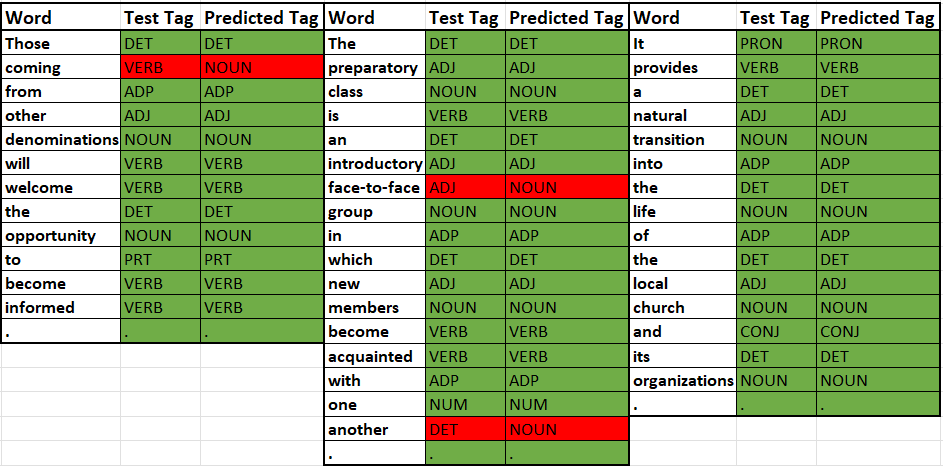

Here we see that, even after a relatively small training set, the model was able to achieve fairly accurate results for tagging. The model was able to correctly tag 92% of the first sentence, 88% of the second sentence, and 100% of the third sentence. Therefore, the model was able to correctly tag 93% of the words in the test set.

When we investigate why these mis-tagged words occured we have to look at the emission and transition probability matrices. Because this model correctly tagged all the first words, we can assume that the initial state distribution is not the issue (although it may not be entirely accurate). What we must look at are the emission and transition probability matrices. Our intuition suggests that if a specific part of speech transition or an occurence of a test word labeled as a given part of speech is not well represented in the training data, that can lead to mis-tagging. Looking at our incorrect taggings we consider the following:

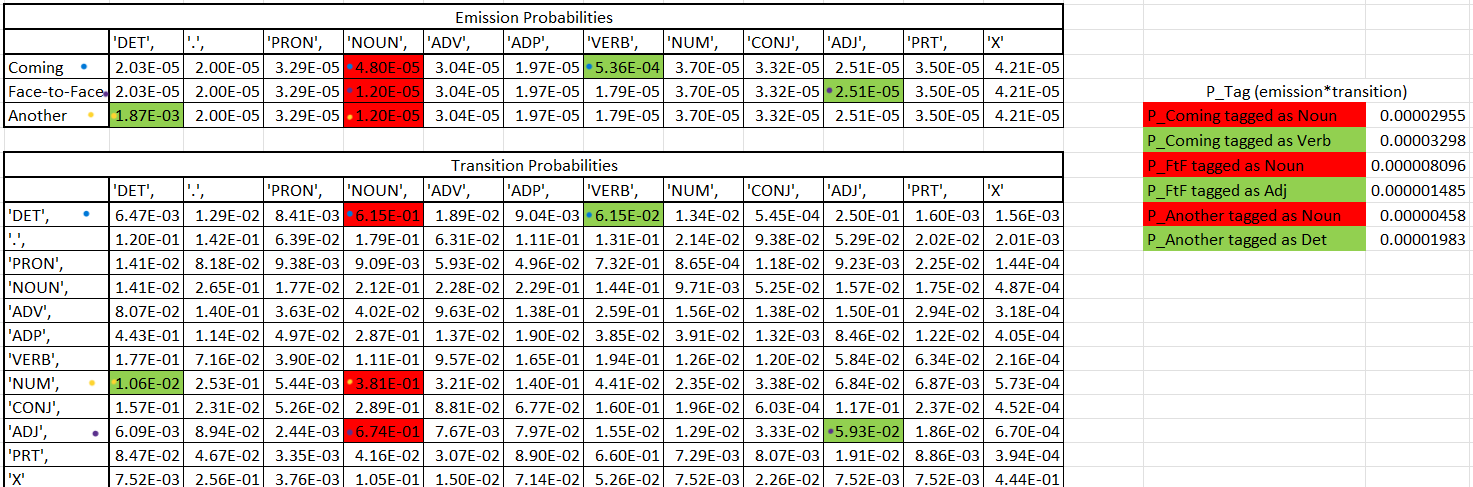

This is problematic for our intuition. We can see our assumtption that the mis-tagging is only related to the emission and transition probabilities is not entirely correct. It serves to explain why face-to-face was tagged incorrectly only. The emission probabilities for face-to-face are actually the OOV emission probabilities since that word does not occur in our training data. The way we constructed these values was by +1 smoothing a zero probability column and dividing it by the row wise sum. This is why there are not constant probabilities for each part of speech. We can also intuit that any probability for one of the other incorrect tagged words which matches the emission probability of face-to-face means that that word did not appear in our training data tagged as that part of speech. We can see from our assessment here that Face-to-Face, with a transition from ADJ, has a higher transmission*emission probability for Noun than it does for ADJ (the correct tag). This means that when the Viterbi Algorithm selects the maximum probability path for the sequence, it will tag Face-to-Face as a Noun. 

Where this intuition fails is for Coming and Another. We know that Another is always a determinant, a fact that is confirmed by our emission matrix where DET has a high probabilty and the rest of the parts of speech mirror the OOV probabilities because it does not occur in the training data as any other part of speech. What we also see from the transition matrix is that transitions from an NUM to a DET are lower than NUM to a NOUN. These are competing probabilities for accuracy. The product of the correct and incorrect probabilities shows that the transition from NUM to DET in the case of the word Another is actually higher than the transition from NUM to NOUN. It is unclear why our algorithm, using these matrices, selects NOUN over DET. The same issue is true for Coming. The only additional probability involved in selecting the maximum probability path for the sequence is the initial state probability. Seeing as this tag is selected correctly and thus would be the same for both the correct and incorrect path, it is unclear why the algorithm incorrectly tags these words. 